In [1]:
# Imports
import random
import string
import tempfile
import shutil
import subprocess as sp
import os

from PIL import Image
from torch import nn as nn
from torch import Generator
from torch.utils.data import random_split,DataLoader
# TODO: Currently assumes that pytest runs from project root
from util.car_dataset import check_dir, check_file, CarDataset, DatasetError
from networks.common import *
from networks.CNNbase import CNNBasic

In [2]:
root = os.getcwd()
print(os.getcwd())

/home/akshay.viswakumar/dl-based-sensor-calib


In [3]:
# Set Up Paths and Metadata for Storing Values
test_class = "Regularization"
test_name = "alpha1"
epochs = 21
checkpoint_path = os.path.join(root,"Test-Results",test_class,test_name)

In [4]:
# Helper Functions
def rand_string(length=5):
    return ''.join(random.choices(string.ascii_letters +
        string.digits, k=length))

def loaded_dataset(temp_dir):
    '''
    Loads the car_dataset and returns the CarDataset object.
    '''
    image_folder_list = ['0_Frames','1_Frames','2_Frames','3_Frames']
    label_file_list = ['0.txt','1.txt','2.txt','3.txt']
    #image_folder_list = ['0_Frames']
    #label_file_list = ['0.txt']
    car_data = CarDataset(temp_dir,image_folder_list,label_file_list)
    car_data.drop_nan()

    return car_data

def dataset_loader(loaded_dataset):
    length = len(loaded_dataset)
    split_set = random_split(loaded_dataset,[round(0.80*length)
                ,round(0.20*length)],generator=Generator().manual_seed(42))
    train_loader = DataLoader(split_set[0],batch_size=20)
    test_loader = DataLoader(split_set[1],batch_size=20)
    '''
    Lowering values to sane levels to help run tests on github
    runners. Ideally on local GPU (4GB) 80/20 split with batch size of
    30 works well.
    '''
    return (train_loader,test_loader)

def network(alpha=0):
    network = CNNBasic(alpha)
    network = network.to(get_device())
    network.double()
    return network

In [5]:
# Load Data
data = loaded_dataset(os.path.join(root,"dummy"))

In [6]:
# Split Dataset
datasets = dataset_loader(data)

In [7]:
# Initialize Network
net = network(alpha=1)

In [8]:
# Train
train = datasets[0]
test = datasets[1]
print("Start Training")
losses = run_training(net,train,test,epochs,get_device(),checkpoint_path,test_name,checkpoint_freq=5)

0it [00:00, ?it/s]

Start Training


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000518
Train Epoch: 0	Train Loss: 0.000632 Test Loss:0.000518


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000570
Train Epoch: 1	Train Loss: 0.000528 Test Loss:0.000570


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000618
Train Epoch: 2	Train Loss: 0.000580 Test Loss:0.000618


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000640
Train Epoch: 3	Train Loss: 0.000615 Test Loss:0.000640


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000650
Train Epoch: 4	Train Loss: 0.000630 Test Loss:0.000650


149it [02:12,  1.13it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000655
Train Epoch: 5	Train Loss: 0.000637 Test Loss:0.000655


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000657
Train Epoch: 6	Train Loss: 0.000640 Test Loss:0.000657


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 7	Train Loss: 0.000641 Test Loss:0.000658


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 8	Train Loss: 0.000642 Test Loss:0.000658


149it [02:13,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 9	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 10	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 11	Train Loss: 0.000642 Test Loss:0.000658


149it [02:15,  1.10it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 12	Train Loss: 0.000642 Test Loss:0.000658


149it [02:15,  1.10it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 13	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 14	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 15	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.10it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 16	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 17	Train Loss: 0.000642 Test Loss:0.000658


149it [02:13,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 18	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 19	Train Loss: 0.000642 Test Loss:0.000658


149it [02:14,  1.11it/s]


Num = 38
Len = 742
Test Set Average Loss 0.000658
Train Epoch: 20	Train Loss: 0.000642 Test Loss:0.000658


In [9]:
# Save Loss Files
save_stats(losses[0],os.path.join(checkpoint_path,'train_loss.pkl')) # Train loss
save_stats(losses[1],os.path.join(checkpoint_path,'test_loss.pkl')) # Test Loss

In [10]:
import matplotlib.pyplot as plt

def plot_losses(test,train):
    plt.figure()
    plt.grid()
    plt.plot(train,label='train')
    plt.plot(test,label='test')
    plt.legend()

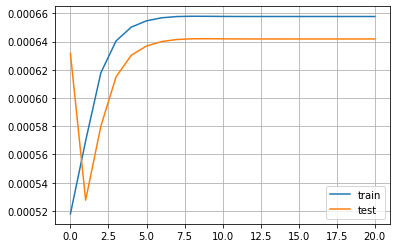

In [11]:
plot_losses(losses[0],losses[1])

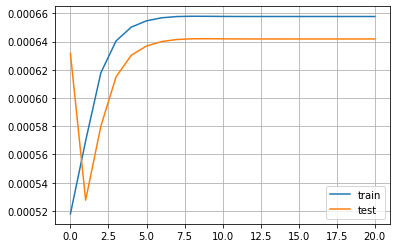

In [12]:
# Just a Backup Test
plot_losses(load_stats(os.path.join(checkpoint_path,'train_loss.pkl')),load_stats(os.path.join(checkpoint_path,'test_loss.pkl')))